<a href="https://colab.research.google.com/github/levynlee/ESAA/blob/main/1115_%ED%95%84%EC%82%AC%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PART4. 합성곱 신경망(CNN)**

##**1. 합성곱 신경망**

합성곱 신경망(CNN: Convolution Neural Network)은 **데이터가 가진 특징들의 패턴을 학습하는 알고리즘**으로 컴퓨터 비전 분야에서 많이 사용된다. 대표적으로 이미지 분류, 객체 탐지, 스타일 전이 등을 예로 들 수 있다.

###**1-1. 이미지 표현**

이미지 또는 영상을 컴퓨터가 이해할 수 있게 하려면 숫자로 표현해야 한다. 0~255 사이의 숫자로 각 픽셀의 화소값을 나타내는 방식으로 표현할 수 있다. 숫자 0은 검은색, 숫자 255는 흰색을 나타낸다. 그 중간에 있는 숫자들은 회색으로 표현된다. 화소를 나타내는 숫자는 이미지의 강도를 나타내고, 숫자가 클수록 더 강한 특성을 나타낸다고 볼 수 있다.  

컬러 이미지는 R, G, B 채널로 구성된 3장의 이미지를 겹쳐서 표현한다. 각 채널 이미지는 채널이 1개인 흑백 이미지와 마찬가지로 0~255 사이의 숫자로 나타내며, 숫자가 클수록 해당 색상을 더 강하게 표현한다.

###**1-2. 합성곱(Convolution)**

합성곱 연산은 입력 이미지에 대하여 일반적으로 정방형 크기를 가지는 커널(kernel)을 사용하여 입력 이미지에 대한 특성을 추출하는 방법이다. 합성곱 연산을 통해 추출된 이미지를 특성맵이라고 한다. 이렇게 추출된 특성맵을 딥러닝 모델 학습에 사용하면 훨씬 더 좋은 성능을 보인다.  

입력 이미지의 크기는 (세로, 가로) 순서로 shape이 출력된다. 즉, 세로 5픽셀, 가로 5픽셀의 크기를 가지는 이미지는 (5, 5)의 shape을 가진다.

###**1-3. 채널(channel)**

채널은 입력 이미지를 구성하는 2차원 배열의 개수이다. 컬러 이미지의 경우 3개의 채널을 가지므로 앞서 언급한 세로 5픽셀, 가로 5픽셀의 컬러 이미지를 shape으로 나타냈을 때는 (5, 5, 3)으로 표현된다.  

입력 이미지가 여러 개의 채널을 갖는 경우 합성곱 연산을 수행할 때 특성맵의 생성 과정을 잘 살펴봐야 한다.  
1. 입력 이미지의 채널 개수만큼 커널 생성
2. 각 채널마다 하나씩 커널을 적용하여 합성곱 연산 수행
3. 입력 이미지의 채널 개수만큼 합성곱 연산된 결과가 생성됨
4. element-wise 덧셈 연산으로 모두 더해줌  




###**1-4. 스트라이드(stride)**

커널은 좌측 상단으로부터 입력 이미지를 기준으로 우측으로 이동하면서 합성곱 연산을 계속 수행하고 특성맵에 결과를 채워나간다. 이때 **이동하는 간격**을 스트라이드로 정의하며, 주로 1 또는 2로 설정한다.  

스트라이드를 1로 설정 시 커널은 우측으로 1픽셀씩 이동하게 되며, 커널이 입력 이미지의 우측 끝까지 이동했다면 아래 방향으로 1칸 좌측 첫 번째 픽셀로 이동하여 추출한다. 스트라이드를 2로 설정하게 되면 2픽셀씩 건너뛰기 때문에 특성맵의 크기가 1/2 로 줄어들게 된다.

###**1-5. 패딩(padding)**

추출된 특성맵의 크기가 입력 이미지 대비 줄어들지 않도록 패딩을 설정할 수 있다. 일반적으로 zero-padding을 사용하며 입력 이미지의 가장자리에 0으로 채워진 패딩 값으로 채운 후 추출한다.

###**1-6. 특성맵(feature map) 사이즈**

###**1-7. 풀링(pooling)**

풀링 레이어는 **추출된 특성맵에 대해 다운 샘플링하여 이미지의 크기를 축소하는 레이어**이다. 풀링 레이어를 사용하면 이미지 축소를 통해 연산량을 감소한다는 점과 과대적합을 방지한다는 장점이 있다.   

풀링 레이어는 **최대 풀링**과 **평균 풀링**으로 나뉜다. 최대 풀링은 특징의 값이 큰 값이 다른 특징들을 대표한다는 개념으로 도입되었다. 최대 풀링 수행 시 커널의 크기가 2x2로 주어질 때 입력 이미지의 2x2 픽셀 중 최대값이 출력 값으로 선택된다. 평균 풀링을 수행하면 2x2 픽셀들의 평균 값이 출력값으로 나온다.풀링 레이어도 스트라이드값을 갖는다.

##**2. 간단한 모델 생성**

###**2-1. 데이터 로드 및 전처리**

In [62]:
!pip install --upgrade tensorflow==2.15.0

In [63]:
# tensorflow 모듈 import
import tensorflow as tf

In [64]:
# mnist 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


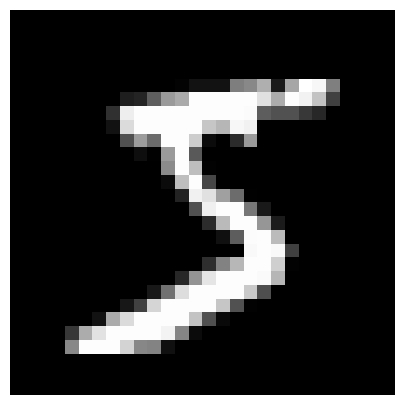

In [65]:
# 샘플 이미지 출력
import matplotlib.pyplot as plt

def plot_image(data, idx):
  plt.figure(figsize=(5,5))
  plt.imshow(data[idx], cmap="gray")
  plt.axis("off")
  plt.show()

plot_image(x_train, 0)

In [66]:
print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0 255
0 255


In [67]:
# 정규화(Normalization)
x_train = x_train / 255.0
x_valid = x_valid / 255.0

print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0.0 1.0
0.0 1.0


In [68]:
# 채널 추가
print(x_train.shape, x_valid.shape)
x_train_in = x_train[..., tf.newaxis]
x_valid_in = x_valid[..., tf.newaxis]
print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


###**2-2. Sequential API로 모델 생성 및 학습**

In [69]:
# Sequential API를 사용해 샘플 모델 생성
model = tf.keras.Sequential([
    # Convolution 적용 (32 filters)
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', ## (3,3) 크기의 서로 다른 32가지 종류 커널
                           input_shape=(28, 28, 1), name='conv'),
    # max pooling 적용
    tf.keras.layers.MaxPooling2D((2,2), name='pool'),
    # classifier 출력층
    tf.keras.layers.Flatten(),
    ## 최종분류기로 Dense 레이어를 적용하기 위해 Flatten 층을 추가하여 1차원 배열로 펼쳐줌
    tf.keras.layers.Dense(10, activation = 'softmax')
    ## 정답 레이블이 0~9까지 10개의 값을 가지므로 노드 개수 10개
    ## 분류 클래스가 10개인 다중 분류 문제이므로 활성화 함수로 softmax 적용
])

In [70]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# 모델 훈련
history = model.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)


Epoch 1/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2089 - accuracy: 0.9408 - val_loss: 0.0850 - val_accuracy: 0.9743
Epoch 2/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0779 - accuracy: 0.9776 - val_loss: 0.0678 - val_accuracy: 0.9790
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0592 - accuracy: 0.9822 - val_loss: 0.0635 - val_accuracy: 0.9795
Epoch 4/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0483 - accuracy: 0.9850 - val_loss: 0.0567 - val_accuracy: 0.9815
Epoch 5/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0422 - accuracy: 0.9874 - val_loss: 0.0513 - val_accuracy: 0.9833
Epoch 6/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0357 - accuracy: 0.9891 - val_loss: 0.0534 - val_accuracy: 0.9831
Epoch 7/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0308 - accuracy: 0.9905 - val_loss: 0.0516 -

In [71]:
model.evaluate(x_valid_in, y_valid)

313/313 [==============================] - 1s 5ms/step - loss: 0.0591 - accuracy: 0.9829


[0.05912897363305092, 0.9829000234603882]

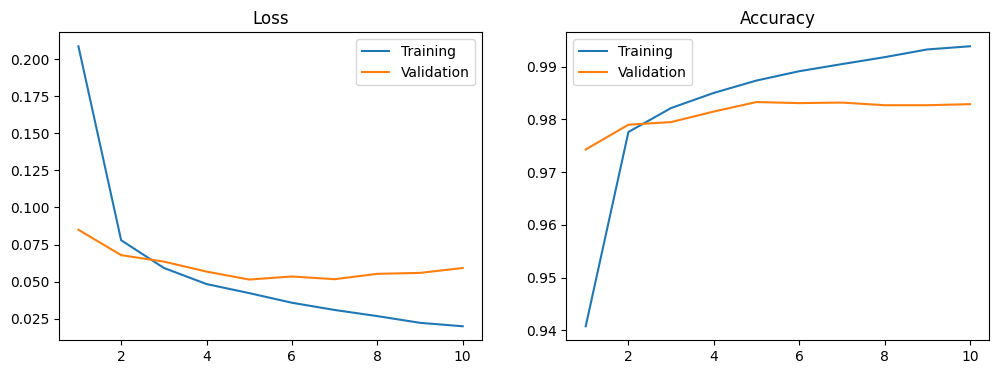

In [72]:
# 10 epoch 동안 모델의 예측 오차와 정확도를 그래프로 그리는 함수를 정의한 다음 실행
def plot_loss_acc(history, epoch):
  loss, val_loss = history.history['loss'], history.history['val_loss']
  acc, val_acc = history.history['accuracy'], history.history['val_accuracy']

  fig, axes = plt.subplots(1, 2, figsize=(12,4))

  axes[0].plot(range(1, epoch+1), loss, label='Training')
  axes[0].plot(range(1, epoch+1), val_loss, label='Validation')
  axes[0].legend(loc='best')
  axes[0].set_title('Loss')

  axes[1].plot(range(1, epoch+1), acc, label='Training')
  axes[1].plot(range(1, epoch+1), val_acc, label='Validation')
  axes[1].legend(loc='best')
  axes[1].set_title('Accuracy')

  plt.show()

plot_loss_acc(history, 10)

훈련 셋에 대한 손실은 계속 줄어드는데 검증 셋의 손실은 어느 수준에서 더 이상 낮아지지 않는다. 즉, 4 epoch 이후부터는 모델이 과대적합으로 진행되었다는 것을 파악할 수 있다.

###**2-3. 모델 구조 파악**

모델 인스턴스에 summary() 메소드를 적용하면 모델의 구조를 요약해서 보여준다. 각 레이어의 이름과 출력 텐서의 형태, 각 레이어를 구성하는 파라미터(가중치) 개수를 알 수 있다.

In [73]:
# 모델 구조
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv (Conv2D)               (None, 26, 26, 32)        320       
                                                                 
 pool (MaxPooling2D)         (None, 13, 13, 32)        0         
                                                                 
 flatten_4 (Flatten)         (None, 5408)              0         
                                                                 
 dense_5 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54410 (212.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [74]:
# 입력 텐서 형태
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

None 값은 배치 크기가 들어오는 위치로, 배치 크기로 어떤 값이든 가능하다는 의미이다.

In [75]:
# 출력 텐서 형태
model.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_5')>

10개의 노드를 갖는 1차원 벡터 형태이다.

In [76]:
# 레이어
model.layers

우리가 작성한 모델은 4개의 레이어로 구성된다.

In [77]:
# 첫 번째 레이어 선택
model.layers[0]

In [78]:
# 첫 번째 레이어 입력
model.layers[0].input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

Conv2D 레이어에는 모델의 입력 데이터가 그대로 들어가기 때문에 (None, 28, 28, 1) 형태를 갖는다.

In [79]:
# 첫 번째 레이어 출력
model.layers[0].output

<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv')>

Conv2D 레이어를 거치면 픽셀 사이즈가 2씩 줄어들고 채널 개수가 32개로 늘어나면서 (None, 26, 26, 32) 형태를 갖는다.

In [80]:
# 첫 번째 레이어 가중치
model.layers[0].weights

[<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[-1.04111254e-01, -1.61748677e-01,  1.60777286e-01,
           -9.34870660e-01,  5.75819850e-01, -8.46015155e-01,
           -4.23780352e-01,  2.60343909e-01,  2.68888623e-02,
            3.74952525e-01, -6.30284905e-01, -5.24063826e-01,
            3.31934154e-01,  3.16072255e-01,  7.01648444e-02,
            2.44041279e-01, -2.01441109e-01,  2.99664617e-01,
            3.49687606e-01,  3.80843543e-02, -1.57534629e-01,
           -1.21031031e-01, -1.07763088e+00, -4.58285451e-01,
            1.55341044e-01,  1.12737902e-01,  1.69854715e-01,
           -8.12693715e-01, -6.84976578e-01, -1.45516622e+00,
           -5.56599855e-01,  5.22003829e-01]],
 
         [[ 4.13307577e-01, -5.66249013e-01,  4.67591137e-01,
           -8.93727839e-01,  3.46809953e-01, -5.26350141e-02,
            2.63487220e-01,  1.95290938e-01,  1.20375626e-01,
            1.56105131e-01, -5.01019061e-01, -4.32021543e-02,
           

weights 속성을 각 레이어 인스턴스에 적용하면 각 레이어의 가중치 행렬을 추출할 수 있다.  

2개의 텐서플로 변수 행렬이 확인되는데, 첫 번째 변수는 커널(합성곱 필터) 행렬의 가중치이고 두 번째 변수는 각 커널의 상수항(bias)이다.

In [81]:
# 첫 번째 레이어 커널 가중치
model.layers[0].kernel

<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[-1.04111254e-01, -1.61748677e-01,  1.60777286e-01,
          -9.34870660e-01,  5.75819850e-01, -8.46015155e-01,
          -4.23780352e-01,  2.60343909e-01,  2.68888623e-02,
           3.74952525e-01, -6.30284905e-01, -5.24063826e-01,
           3.31934154e-01,  3.16072255e-01,  7.01648444e-02,
           2.44041279e-01, -2.01441109e-01,  2.99664617e-01,
           3.49687606e-01,  3.80843543e-02, -1.57534629e-01,
          -1.21031031e-01, -1.07763088e+00, -4.58285451e-01,
           1.55341044e-01,  1.12737902e-01,  1.69854715e-01,
          -8.12693715e-01, -6.84976578e-01, -1.45516622e+00,
          -5.56599855e-01,  5.22003829e-01]],

        [[ 4.13307577e-01, -5.66249013e-01,  4.67591137e-01,
          -8.93727839e-01,  3.46809953e-01, -5.26350141e-02,
           2.63487220e-01,  1.95290938e-01,  1.20375626e-01,
           1.56105131e-01, -5.01019061e-01, -4.32021543e-02,
           5.23466095e-02,  

In [82]:
# 첫 번째 레이어 bias 가중치
model.layers[0].bias

<tf.Variable 'conv/bias:0' shape=(32,) dtype=float32, numpy=
array([-0.1036234 , -0.04883317, -0.00320945, -0.02469524,  0.19242696,
       -0.04084076, -0.2593154 , -0.23737025, -0.27877432, -0.10495796,
       -0.01983224, -0.07051764, -0.2779177 , -0.3383342 , -0.2568422 ,
       -0.01120187, -0.00568777, -0.33715358, -0.3551195 , -0.07866751,
       -0.03874208, -0.2289937 , -0.05646787, -0.17246713, -0.014627  ,
       -0.22445431, -0.01395346, -0.18708065, -0.17916974,  0.07523736,
       -0.44722244, -0.05167538], dtype=float32)>

In [83]:
# 레이어 이름 사용하여 레이어 선택
model.get_layer('conv')

In [84]:
# 샘플 이미지의 레이어별 출력을 리스트에 추가(첫 번째, 두 번째 레이어)
activator = tf.keras.Model(inputs=model.input,
                           outputs=[layer.output for layer in model.layers[:2]])
activations = activator.predict(x_train_in[0][tf.newaxis, ...])
len(activations)

1/1 [==============================] - 0s 65ms/step


2

In [85]:
# 첫 번재 레이어(conv)의 출력층
conv_activation = activations[0]
conv_activation.shape

(1, 26, 26, 32)

1은 입력 이미지의 개수. 즉 샘플이 1개라는 뜻이다.

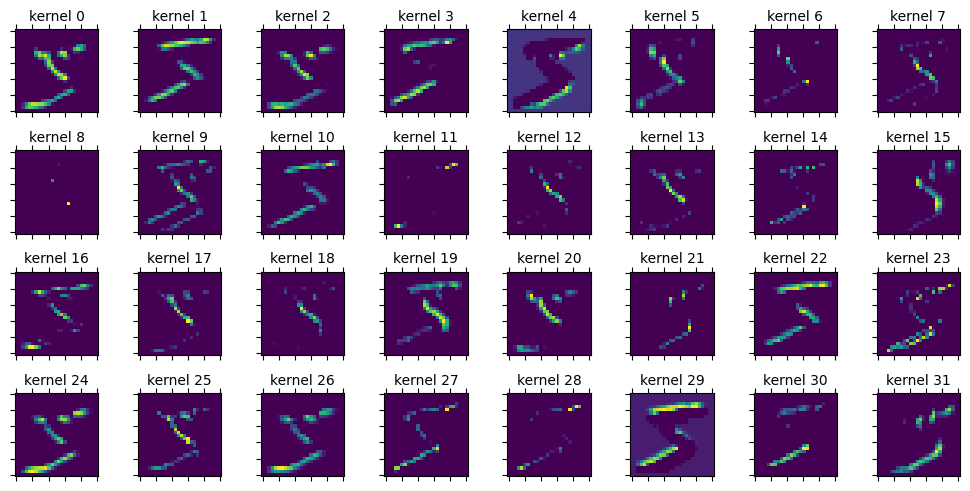

In [86]:
# Convolution 시각화
fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
  axes[i//8, i%8].matshow(conv_activation[0, :, :, i], cmap='viridis')
  axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
  plt.setp(axes[i//8, i%8].get_xticklabels(), visible=False)
  plt.setp(axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

출력 이미지의 특징이 조금씩 차이가 있는데, 이처럼 각 커널은 입력 이미지로부터 서로 다른 피처를 추출하는 역할을 한다.

In [87]:
# 두번째 레이어(pool) 출력층
pooling_activation = activations[1]
print(pooling_activation.shape)

(1, 13, 13, 32)


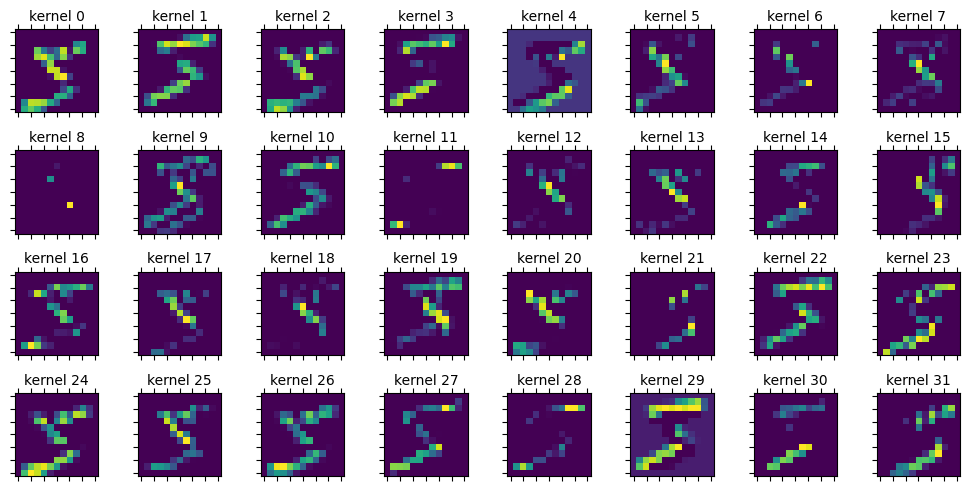

In [88]:
# 시각화
fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
  axes[i//8, i%8].matshow(pooling_activation[0, :, :, i], cmap='viridis')
  axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
  plt.setp(axes[i//8, i%8].get_xticklabels(), visible=False)
  plt.setp(axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

앞선 Conv2D 출력 이미지에 비해 화소 크기가 굵어졌다. 최대 풀링은 인근 픽셀들을 모아서 최대값으로 고정하기 떄문에 픽셀 수는 줄이면서 특징을 더욱 강하게 드러낼 수 있다.

##**3. 복잡한 모델 생성**

Functional API를 사용하면 Sequential API로 구현할 수 없는 복잡한 구조의 모델을 정의할 수 있다. 예를 들면, 각 레이어를 기준으로 입력이 2개 이상이거나 출력이 2개 이상인 모델을 만들 수 있다. 중간에 있는 레이어들을 건너뛰고 뒤쪽에 있는 레이어로 출력 텐서를 전달하는 방식으로 직접 연결하는 방법도 가능하다.

###**3-1. 데이터셋 준비**

In [89]:
import tensorflow as tf
import numpy as np

In [90]:
#mnist 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [91]:
# 새로운 출력 값 배열 생성 (홀수 : 1, 짝수 : 0)
y_train_odd = []
for y in y_train:
  if y%2 == 0:
    y_train_odd.append(0)
  else:
    y_train_odd.append(1)

y_train_odd = np.array(y_train_odd)
y_train_odd.shape

(60000,)

In [92]:
print(y_train[:10])
print(y_train_odd[:10])

[5 0 4 1 9 2 1 3 1 4]
[1 0 0 1 1 0 1 1 1 0]


In [93]:
# Validation 데이터셋 처리
y_valid_odd = []
for y in y_valid:
  if y%2 == 0:
    y_valid_odd.append(0)
  else:
    y_valid_odd.append(1)

y_valid_odd = np.array(y_valid_odd)
y_valid_odd.shape

(10000,)

색상이 하나인 모노 컬러 이미지이므로, 새로운 축을 추가하고 채널 개수를 1개로 지정한다. 축의 인덱스로 -1을 지정했기 때문에 새로운 축은 끝에 추가된다.

In [94]:
# 정규화
x_train = x_train/255.0
x_valid = x_valid/255.0

# 채널 추가
x_train_in = tf.expand_dims(x_train, -1)
x_valid_in = tf.expand_dims(x_valid, -1)

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


###**3-2. Functional API로 다중 입력, 다중 출력 레이어 생성**

In [95]:
# Functional API 를 사용하여 모델 생성

inputs = tf.keras.layers.Input(shape = (28, 28, 1))

conv = tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu')(inputs)
pool = tf.keras.layers.MaxPooling2D((2,2))(conv)
flat = tf.keras.layers.Flatten()(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
outputs = tf.keras.layers.Dense(10, activation = 'softmax')(concat)

model = tf.keras.models.Model(inputs = inputs, outputs = outputs)

model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d_1 (Conv2D)           (None, 26, 26, 32)           320       ['input_2[0][0]']             
                                                                                                  
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)           0         ['conv2d_1[0][0]']            
 g2D)                                                                                             
                                                                                                  
 flatten_5 (Flatten)         (None, 5408)                 0         ['max_pooling2d_1[0][0]'

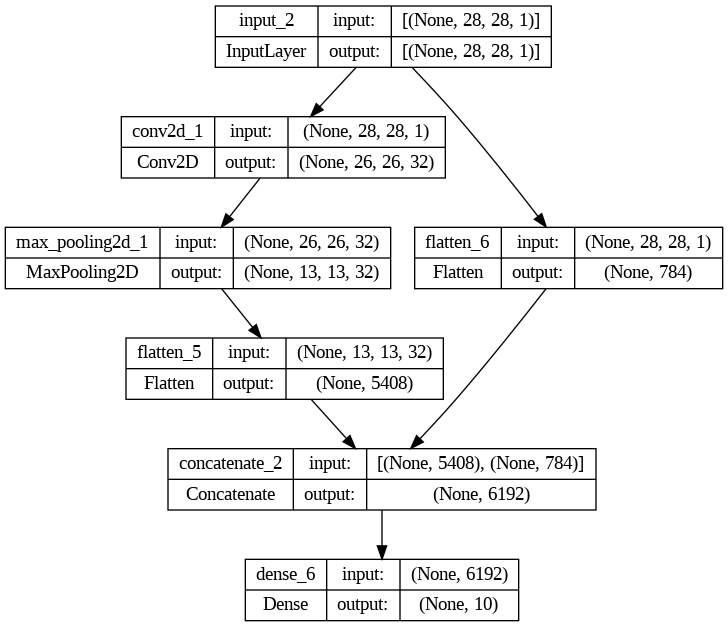

In [96]:
# 모델 구조 출력 및 이미지 파일로 저장
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True, show_layer_names = True, to_file = 'functional_cnn.png')

입력 레이어가 2개의 출력으로 나누어지고 마지막 Dense 레이어를 통과하기 전에 Concatenate 레이어에서 하나로 합쳐지는 구조를 시각적으로 확인할 수 있다.

In [97]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train_in, y_train, validation_data=(x_valid, y_valid), epochs=10)

# 모델 성능
val_loss, val_acc = model.evaluate(x_valid_in, y_valid)
print(val_loss, val_acc)

Epoch 1/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2132 - accuracy: 0.9387 - val_loss: 0.0928 - val_accuracy: 0.9712
Epoch 2/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0801 - accuracy: 0.9767 - val_loss: 0.0680 - val_accuracy: 0.9776
Epoch 3/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0599 - accuracy: 0.9827 - val_loss: 0.0652 - val_accuracy: 0.9799
Epoch 4/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0490 - accuracy: 0.9848 - val_loss: 0.0536 - val_accuracy: 0.9835
Epoch 5/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0400 - accuracy: 0.9874 - val_loss: 0.0531 - val_accuracy: 0.9826
Epoch 6/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0330 - accuracy: 0.9898 - val_loss: 0.0539 - val_accuracy: 0.9840
Epoch 7/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0292 - accuracy: 0.9907 - val_loss: 0.0557 -

모델의 정확도는 약 98%로, 앞에서 학습했던 Sequential 모델과 큰 차이는 없다.

입력 이미지와 분류하는 문제가 비교적 단순하기 때문에 차이가 크게 느껴지지 않지만, 입력 이미지와 해결해야 하는 문제가 복잡한 경우에는 모델의 구조를 다양하게 만들어서 더 좋은 성능을 보여주는 모델을 찾는 과정이 필요하다.

###**3-3. 다중 출력 분류 모델**

다음은 0~9까지 숫자를 맞추는 분류 문제와 홀수, 짝수를 맞추는 분류 문제를 동시에 풀어내는 모델을 정의하는 코드다. 각기 다른 문제에 맞도록 최종 분류기의 출력 레이어를 2개 만드는 것이 핵심이다.

In [98]:
# Functional API를 사용해 모델 생성

inputs = tf.keras.layers.Input(shape = (28, 28, 1), name = 'inputs')

conv = tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', name = 'conv2d_layer')(inputs)
pool = tf.keras.layers.MaxPooling2D((2,2), name = 'maxpool_layer')(conv)
flat = tf.keras.layers.Flatten(name = 'flatten_layer')(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
digit_outputs = tf.keras.layers.Dense(10, activation = 'softmax', name = 'digit_dense')(concat)

odd_outputs = tf.keras.layers.Dense(1, activation = 'sigmoid', name = 'odd_dense')(flat_inputs)

model = tf.keras.models.Model(inputs = inputs, outputs = [digit_outputs, odd_outputs])

model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 inputs (InputLayer)         [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d_layer (Conv2D)       (None, 26, 26, 32)           320       ['inputs[0][0]']              
                                                                                                  
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)           0         ['conv2d_layer[0][0]']        
 D)                                                                                               
                                                                                                  
 flatten_layer (Flatten)     (None, 5408)                 0         ['maxpool_layer[0][0]'] 

In [99]:
# 모델의 입력과 출력을 나타내는 텐서
print(model.input)
print(model.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='inputs'), name='inputs', description="created by layer 'inputs'")
[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'digit_dense')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'odd_dense')>]


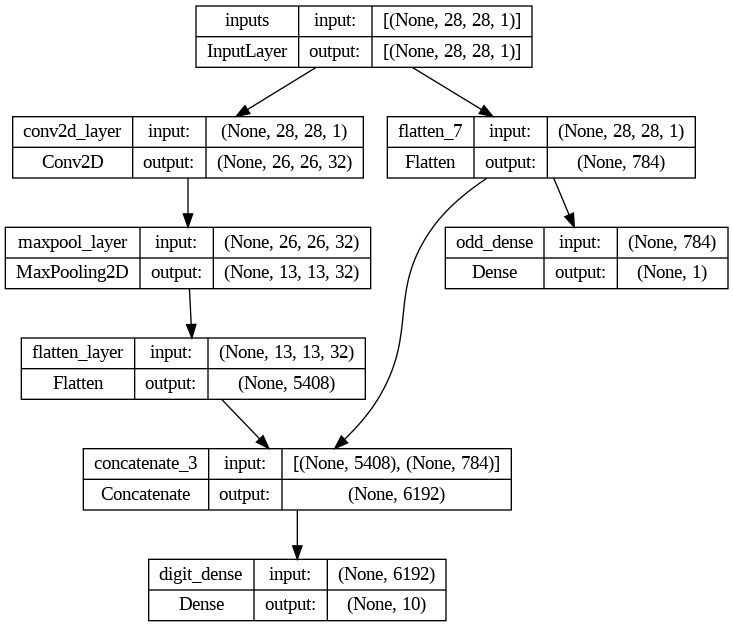

In [100]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, to_file='multi_output_cnn.png')

In [101]:
# 모델 컴파일
model.compile(optimizer='adam',
              loss={'digit_dense': 'sparse_categorical_crossentropy',
                    'odd_dense':'binary_crossentropy'},
              loss_weights={'digit_dense':1, 'odd_dense':0.5},
              # loss = 1.0 * sparse_categorical_crossentropy + 0.5 * binary_crossentropy
              metrics=['accuracy'])

# 모델 훈련
history = model.fit({'inputs':x_train_in},
                  {'digit_dense':y_train, 'odd_dense':y_train_odd},
                   validation_data=({'inputs':x_valid_in}, {'digit_dense':y_valid, 'odd_dense':y_valid_odd}), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 32s 16ms/step - loss: 0.3596 - digit_dense_loss: 0.1970 - odd_dense_loss: 0.3251 - digit_dense_accuracy: 0.9444 - odd_dense_accuracy: 0.8645 - val_loss: 0.2203 - val_digit_dense_loss: 0.0826 - val_odd_dense_loss: 0.2753 - val_digit_dense_accuracy: 0.9737 - val_odd_dense_accuracy: 0.8881
Epoch 2/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2117 - digit_dense_loss: 0.0759 - odd_dense_loss: 0.2716 - digit_dense_accuracy: 0.9776 - odd_dense_accuracy: 0.8914 - val_loss: 0.2028 - val_digit_dense_loss: 0.0705 - val_odd_dense_loss: 0.2645 - val_digit_dense_accuracy: 0.9771 - val_odd_dense_accuracy: 0.8947
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1896 - digit_dense_loss: 0.0582 - odd_dense_loss: 0.2628 - digit_dense_accuracy: 0.9826 - odd_dense_accuracy: 0.8953 - val_loss: 0.1913 - val_digit_dense_loss: 0.0615 - val_odd_dense_loss: 0.2596 - val_digit_dense_accuracy: 0.9807 -

In [102]:
# 모델 성능
model.evaluate({'inputs':x_valid_in}, {'digit_dense':y_valid, 'odd_dense':y_valid_odd})

313/313 [==============================] - 2s 6ms/step - loss: 0.1883 - digit_dense_loss: 0.0601 - odd_dense_loss: 0.2565 - digit_dense_accuracy: 0.9849 - odd_dense_accuracy: 0.9009


[0.18832799792289734,
 0.060066089034080505,
 0.2565237581729889,
 0.9848999977111816,
 0.9009000062942505]

숫자를 맞추는 문제는 98%의 정확도를 보인 반면 홀수 여부를 판단하는 문제는 약 90%의 정확도를 보인다. 홀수 여부를 판단하는 분류기에 레이어를 더 추가해 예측 정확도를 높일 여지가 있다.

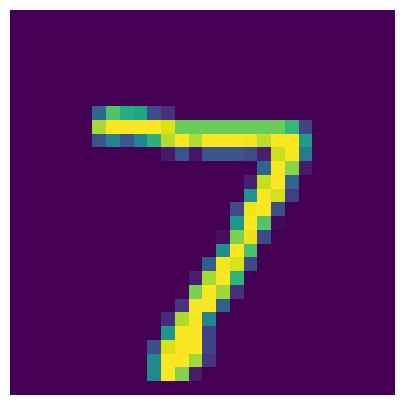

In [103]:
# 샘플 이미지 출력
## 숫자 7에 대한 손글씨 이미지(검증 데이터셋 인덱스 0에 해당하는 이미지)
import matplotlib.pylab as plt

def plot_image(data, idx):
  plt.figure(figsize=(5,5))
  plt.imshow(data[idx])
  plt.axis('off')
  plt.show()

plot_image(x_valid, 0)

In [104]:
# 숫자 7 이미지에 대한 예측 확률
digit_preds, odd_preds = model.predict(x_valid_in)
print(digit_preds[0])
print(odd_preds[0])

313/313 [==============================] - 3s 8ms/step
[2.6702134e-12 1.6326152e-11 5.7359018e-10 7.3399419e-06 6.0228966e-12
 2.0628263e-12 1.6817477e-21 9.9999255e-01 1.2780774e-09 3.3062149e-09]
[0.9994423]


In [105]:
# 예측 확률을 실제 정답 레이블로 변환
digit_labels = np.argmax(digit_preds, axis=1)
digit_labels[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

검증 데이터셋의 첫 10개 이미에 대한 예측 레이블은 위와 같고 첫 번째 이미지를 7로 예측하고 있다.

In [106]:
# 홀수, 짝수 여부에 대한 예측 레이블 출력
## 임계값으로 0.5 지정: 홀수일 확률이 0.5보다 큰 경우 홀수로 분류
odd_labels = (odd_preds>0.5).astype(np.int64).reshape(1, -1)[0]
odd_labels[0:10]

array([1, 0, 1, 0, 0, 1, 0, 1, 0, 1])

###**3-4. 전이 학습(Transfer Learning)**

기존에 학습된 모델을 활용해 새로운 모델을 만들어내는 것을 전이 학습이라고 한다.

In [107]:
# 앞의 모델에서 flatten_layer 출력을 추출
base_model_output = model.get_layer('flatten_layer').output

# 앞의 출력을 출력으로 하는 모델 정의
base_model = tf.keras.Model(inputs = model.input, outputs = base_model_output, name = 'base')
base_model.summary()

Model: "base"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 320 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


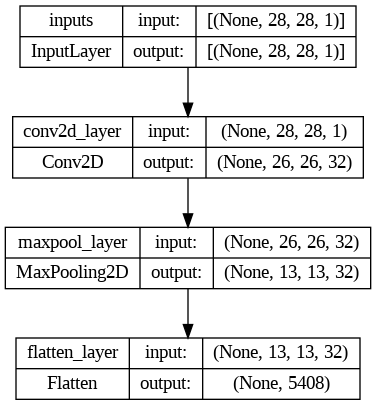

In [108]:
tf.keras.utils.plot_model(base_model, show_shapes=True, show_layer_names=True, to_file='base_model.png')

In [109]:
# Sequential API 적용
## 앞에서 정의한 base_model을 레이어로 추가
## 최종 분류기 역할을 하는 Dense 레이어를 새롭게 이어서 추가
digit_model = tf.keras.Sequential([
    base_model, tf.keras.layers.Dense(10, activation='softmax')
])
digit_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base (Functional)           (None, 5408)              320       
                                                                 
 dense_7 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54410 (212.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


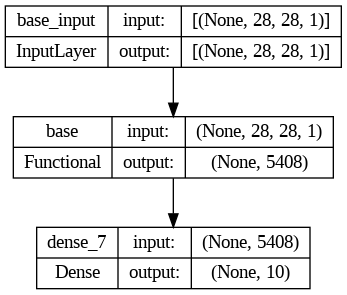

In [110]:
tf.keras.utils.plot_model(digit_model, show_shapes=True, show_layer_names=True, to_file='digit_model.png')

In [111]:
# 모델 컴파일
digit_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 28s 14ms/step - loss: 0.1297 - accuracy: 0.9633 - val_loss: 0.0621 - val_accuracy: 0.9805
Epoch 2/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0568 - accuracy: 0.9827 - val_loss: 0.0585 - val_accuracy: 0.9816
Epoch 3/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0444 - accuracy: 0.9864 - val_loss: 0.0521 - val_accuracy: 0.9837
Epoch 4/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0357 - accuracy: 0.9887 - val_loss: 0.0591 - val_accuracy: 0.9800
Epoch 5/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0294 - accuracy: 0.9911 - val_loss: 0.0504 - val_accuracy: 0.9842
Epoch 6/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0238 - accuracy: 0.9927 - val_loss: 0.0586 - val_accuracy: 0.9815
Epoch 7/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0208 - accuracy: 0.9940 - val_loss: 0.0539 -

모델 인스턴스는 trainable 속성을 갖고 있다. 이 속성을 False로 지정하면 모델의 파라미터 값이 고정되어 훈련을 통해서 업데이터 되지 않는다.

In [112]:
# 베이스 모델의 가중치 고정(Freeze Model)

base_model_frozen = tf.keras.models.Model(inputs = model.input, outputs = base_model_output, name = 'base_frozen')
base_model_frozen.trainable = False
base_model_frozen.summary()

Model: "base_frozen"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 320 (1.25 KB)
_________________________________________________________________


In [113]:
# Functional API 적용
dense_output = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen.output)
digit_model_frozen = tf.keras.models.Model(inputs = base_model_frozen.input, outputs = dense_output)
digit_model_frozen.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_8 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54090 (211.29 KB)
Non-trainable params: 320 (1.25 KB)
_____________________

In [114]:
# 모델 컴파일
digit_model_frozen.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model_frozen.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1156 - accuracy: 0.9689 - val_loss: 0.0565 - val_accuracy: 0.9817
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0499 - accuracy: 0.9855 - val_loss: 0.0465 - val_accuracy: 0.9853
Epoch 3/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0365 - accuracy: 0.9891 - val_loss: 0.0504 - val_accuracy: 0.9845
Epoch 4/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0285 - accuracy: 0.9914 - val_loss: 0.0488 - val_accuracy: 0.9849
Epoch 5/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0236 - accuracy: 0.9927 - val_loss: 0.0620 - val_accuracy: 0.9815
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0188 - accuracy: 0.9946 - val_loss: 0.0554 - val_accuracy: 0.9836
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0157 - accuracy: 0.9951 - val_loss: 0.0531 - val_ac

모델 전체가 아니라 특정 레이어를 지정하여 파라미터가 업데이트되지 않도록 고정할 수도 있다.

In [115]:
# 베이스 모델의 Conv2D 레이어의 가중치만 고정(Freeze Layer)
base_model_frozen2 = tf.keras.models.Model(inputs = model.input, outputs = base_model_output, name = 'base_frozen2')
base_model_frozen2.get_layer('conv2d_layer').trainable=False
base_model_frozen2.summary()

Model: "base_frozen2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 320 (1.25 KB)
_________________________________________________________________


앞에서 고정한 모델에 새로운 분류기 역할을 하는 Dense 레이어를 연결하여 모델을 구성한다.

In [116]:
# Functional API 적용
dense_output2 = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen2.output)
digit_model_frozen2 = tf.keras.models.Model(inputs = base_model_frozen2.input, outputs = dense_output2)
digit_model_frozen2.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_9 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54090 (211.29 KB)
Non-trainable params: 320 (1.25 KB)
_____________________

In [117]:
# 모델 컴파일
digit_model_frozen2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model_frozen2.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1149 - accuracy: 0.9690 - val_loss: 0.0579 - val_accuracy: 0.9821
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0491 - accuracy: 0.9853 - val_loss: 0.0542 - val_accuracy: 0.9825
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0363 - accuracy: 0.9887 - val_loss: 0.0490 - val_accuracy: 0.9840
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0288 - accuracy: 0.9913 - val_loss: 0.0513 - val_accuracy: 0.9836
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0229 - accuracy: 0.9926 - val_loss: 0.0517 - val_accuracy: 0.9844
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0183 - accuracy: 0.9943 - val_loss: 0.0552 - val_accuracy: 0.9838
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0160 - accuracy: 0.9949 - val_loss: 0.0554 - val_ac